2.交通より、交通事故の検証を行う
使用するサイトは、https://www.npa.go.jp/publications/statistics/koutsuu/toukeihyo.html
警察庁の交通事故がまとまったサイトである。

事故の総数と死者数と負傷者数の割合はどの県も変わらないと仮説を立てる。

2024年の1月から12月の各都道府県ごとの事故総数と死者数と負傷者数の合計の平均をとり、事故の総数と死者数と負傷者数の割合が一定のものである

一定の定義としては、

In [5]:
import requests
from bs4 import BeautifulSoup
import time

# URLからHTMLを取得
url = 'https://www.npa.go.jp/publications/statistics/koutsuu/toukeihyo.html'

response = requests.get(url)
if response.status_code == 200:
    print(f"[SUCCESS] url取得成功")
else:
    print(f"[ERROR] url取得失敗: ステータスコード {response.status_code}")

html = response.content

# BeautifulSoupを使ってHTMLを解析
soup = BeautifulSoup(html, 'html.parser')

links = soup.find_all('a')


# 最初の8つを除き、12個のリンクをリストに保存
selected_links = [link.get('href') for link in links[9:20]]
print(selected_links)

[SUCCESS] url取得成功
['https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&lid=000001429922', 'https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&lid=000001431467', 'https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&lid=000001433924', 'https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&lid=000001435762', 'https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&lid=000001438042', 'https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&lid=000001439962', 'https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&lid=000001441702', 'https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&lid=000001443382', 'https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&lid=000001444903', 'https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&lid=000001446723', 'https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&lid=000001448343']


In [6]:
all_links = []
for link_url in selected_links:
    response = requests.get(link_url)
    if response.status_code == 200:
        print(f"[SUCCESS] url取得成功")
    else:
        print(f"[ERROR] url取得失敗: ステータスコード {response.status_code}")

    html = response.content

    # BeautifulSoupを使ってHTMLを解析
    soup = BeautifulSoup(html, 'html.parser')

    # class="stat-dl_icon stat-icon_1 stat-icon_format js-dl stat-download_icon_left"のものを抽出
    target_elements = soup.find_all('a', class_='stat-dl_icon stat-icon_1 stat-icon_format js-dl stat-download_icon_left')

    # 最初の8つを除き、12個のリンクをリストに保存
    target_elements = target_elements[26].get('href')

    all_links.append(target_elements)
    time.sleep(1)
print(all_links)

[SUCCESS] url取得成功
[SUCCESS] url取得成功
[SUCCESS] url取得成功
[SUCCESS] url取得成功
[SUCCESS] url取得成功
[SUCCESS] url取得成功
[SUCCESS] url取得成功
[SUCCESS] url取得成功
[SUCCESS] url取得成功
[SUCCESS] url取得成功
[SUCCESS] url取得成功
['/stat-search/file-download?statInfId=000040151161&fileKind=1', '/stat-search/file-download?statInfId=000040156717&fileKind=1', '/stat-search/file-download?statInfId=000040174449&fileKind=1', '/stat-search/file-download?statInfId=000040180408&fileKind=1', '/stat-search/file-download?statInfId=000040187210&fileKind=1', '/stat-search/file-download?statInfId=000040193068&fileKind=1', '/stat-search/file-download?statInfId=000040199628&fileKind=1', '/stat-search/file-download?statInfId=000040207850&fileKind=1', '/stat-search/file-download?statInfId=000040215569&fileKind=1', '/stat-search/file-download?statInfId=000040224709&fileKind=1', '/stat-search/file-download?statInfId=000040232709&fileKind=1']


In [7]:
# ベースURL
base_url = 'https://www.e-stat.go.jp'

def download_file(url, save_path, encoding=None):
    try:
        # HTTPリクエストを送信
        response = requests.get(url)
        # ステータスコードを確認
        if response.status_code == 200:
            # エンコーディングを指定してテキストとして保存
            if encoding:
                response.encoding = encoding  # エンコーディングを設定
                with open(save_path, 'w', encoding='utf-8') as file:  # UTF-8 に変換して保存
                    file.write(response.text)
            else:
                with open(save_path, 'wb') as file:
                    file.write(response.content)
            print(f"ファイルが保存されました: {save_path}")
        else:
            print(f"ダウンロードに失敗しました。ステータスコード: {response.status_code}")
    except Exception as e:
        print(f"エラーが発生しました: {e}")

# all_target_elementsの各URLに対してダウンロードを実行
for i, relative_url in enumerate(all_links):
    full_url = base_url + relative_url
    save_path = f'csvs/month_{i+1}.csv'

    # e-Statのデータは通常 Shift_JIS を使用していることが多い
    download_file(full_url, save_path, encoding='shift_jis')


ファイルが保存されました: csvs/month_1.csv
ファイルが保存されました: csvs/month_2.csv
ファイルが保存されました: csvs/month_3.csv
ファイルが保存されました: csvs/month_4.csv
ファイルが保存されました: csvs/month_5.csv
ファイルが保存されました: csvs/month_6.csv
ファイルが保存されました: csvs/month_7.csv
ファイルが保存されました: csvs/month_8.csv
ファイルが保存されました: csvs/month_9.csv
ファイルが保存されました: csvs/month_10.csv
ファイルが保存されました: csvs/month_11.csv


In [9]:
import pandas as pd
import sqlite3
import os
from glob import glob

# CSVファイルを読み込み、処理を実行する関数
def process_csv(file_path, db_path, table_name):
    try:
        # CSVファイルを読み込み（エンコーディングを指定、最初の3行をスキップ）
        df = pd.read_csv(file_path, encoding='utf-8', skiprows=3)  # 必要に応じて 'shift_jis' に変更

        # 必要な列だけを抽出（複数の「人」カラムを含む）
        required_columns = ['地域コード', '都道府県・方面本部', '件']
        all_people_columns = [col for col in df.columns if '人' in col]  # 「人」を含むすべての列を探す
        required_columns.extend(all_people_columns)  # 必要な列に「人」を含む列を追加

        if all(col in df.columns for col in required_columns):
            filtered_df = df[required_columns]  # 必要な列だけ抽出

            # 「都道府県・方面本部」列の「計」を「北海道」に置換
            filtered_df['都道府県・方面本部'] = filtered_df['都道府県・方面本部'].replace('計', '北海道')

            # 地域コードの欠損値を除去
            filtered_df = filtered_df.dropna(subset=['地域コード'])

            # 最下部の行を削除
            filtered_df = filtered_df.iloc[:-1]

            # カラム名を一通り変更
            new_column_names = ['地域コード', '都道府県名', '交通事故件数', '死者数', '負傷者数']
            filtered_df.columns = new_column_names[:len(filtered_df.columns)]  # 必要な数だけ適用

            # ファイル名の列を追加
            file_name = os.path.basename(file_path)  # ファイル名を取得
            filtered_df['ファイル名'] = file_name

            # データを SQLite データベースに保存
            save_to_sqlite(filtered_df, db_path, table_name)

            print(f"データがデータベースに保存されました: {file_name}, データベース: {db_path}, テーブル名: {table_name}")
        else:
            missing_cols = [col for col in required_columns if col not in df.columns]
            print(f"以下の列が見つかりません: {', '.join(missing_cols)}")
    except Exception as e:
        print(f"エラーが発生しました: {e}")

# DataFrame を SQLite データベースに保存する関数
def save_to_sqlite(df, db_path, table_name):
    try:
        # SQLite データベースに接続
        conn = sqlite3.connect(db_path)
        # データを保存（既存のテーブルがあれば追加）
        df.to_sql(table_name, conn, if_exists='append', index=False)
        # 接続を閉じる
        conn.close()
    except Exception as e:
        print(f"データベースへの保存中にエラーが発生しました: {e}")

# ディレクトリ内のすべてのCSVファイルを処理する関数
def process_all_csvs(directory, db_path, table_name):
    try:
        # ディレクトリ内のすべてのCSVファイルを取得
        csv_files = glob(os.path.join(directory, '*.csv'))
        if not csv_files:
            print("指定されたディレクトリにCSVファイルが見つかりません。")
            return

        # 各CSVファイルを処理
        for file_path in csv_files:
            process_csv(file_path, db_path, table_name)
    except Exception as e:
        print(f"ディレクトリ処理中にエラーが発生しました: {e}")

# 使用例
process_all_csvs(
    directory='csvs',            # CSVファイルが保存されているディレクトリ
    db_path='traffic_data.db',   # 保存するSQLiteデータベースのパス
    table_name='traffic_accidents'  # 保存するテーブル名
)


データがデータベースに保存されました: month_10.csv, データベース: traffic_data.db, テーブル名: traffic_accidents
データがデータベースに保存されました: month_11.csv, データベース: traffic_data.db, テーブル名: traffic_accidents
データがデータベースに保存されました: month_8.csv, データベース: traffic_data.db, テーブル名: traffic_accidents
データがデータベースに保存されました: month_9.csv, データベース: traffic_data.db, テーブル名: traffic_accidents
データがデータベースに保存されました: month_1.csv, データベース: traffic_data.db, テーブル名: traffic_accidents
データがデータベースに保存されました: month_2.csv, データベース: traffic_data.db, テーブル名: traffic_accidents
データがデータベースに保存されました: month_3.csv, データベース: traffic_data.db, テーブル名: traffic_accidents
データがデータベースに保存されました: month_7.csv, データベース: traffic_data.db, テーブル名: traffic_accidents
データがデータベースに保存されました: month_6.csv, データベース: traffic_data.db, テーブル名: traffic_accidents
データがデータベースに保存されました: month_4.csv, データベース: traffic_data.db, テーブル名: traffic_accidents
データがデータベースに保存されました: month_5.csv, データベース: traffic_data.db, テーブル名: traffic_accidents


/var/folders/wy/0j1xpr0d6vnctww8wnyh3glm0000gn/T/ipykernel_48719/2441998933.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['都道府県・方面本部'] = filtered_df['都道府県・方面本部'].replace('計', '北海道')
/var/folders/wy/0j1xpr0d6vnctww8wnyh3glm0000gn/T/ipykernel_48719/2441998933.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['都道府県・方面本部'] = filtered_df['都道府県・方面本部'].replace('計', '北海道')
/var/folders/wy/0j1xpr0d6vnctww8wnyh3glm0000gn/T/ipykernel_48719/2441998933.py:21: SettingWithCopyWarning: 
A 

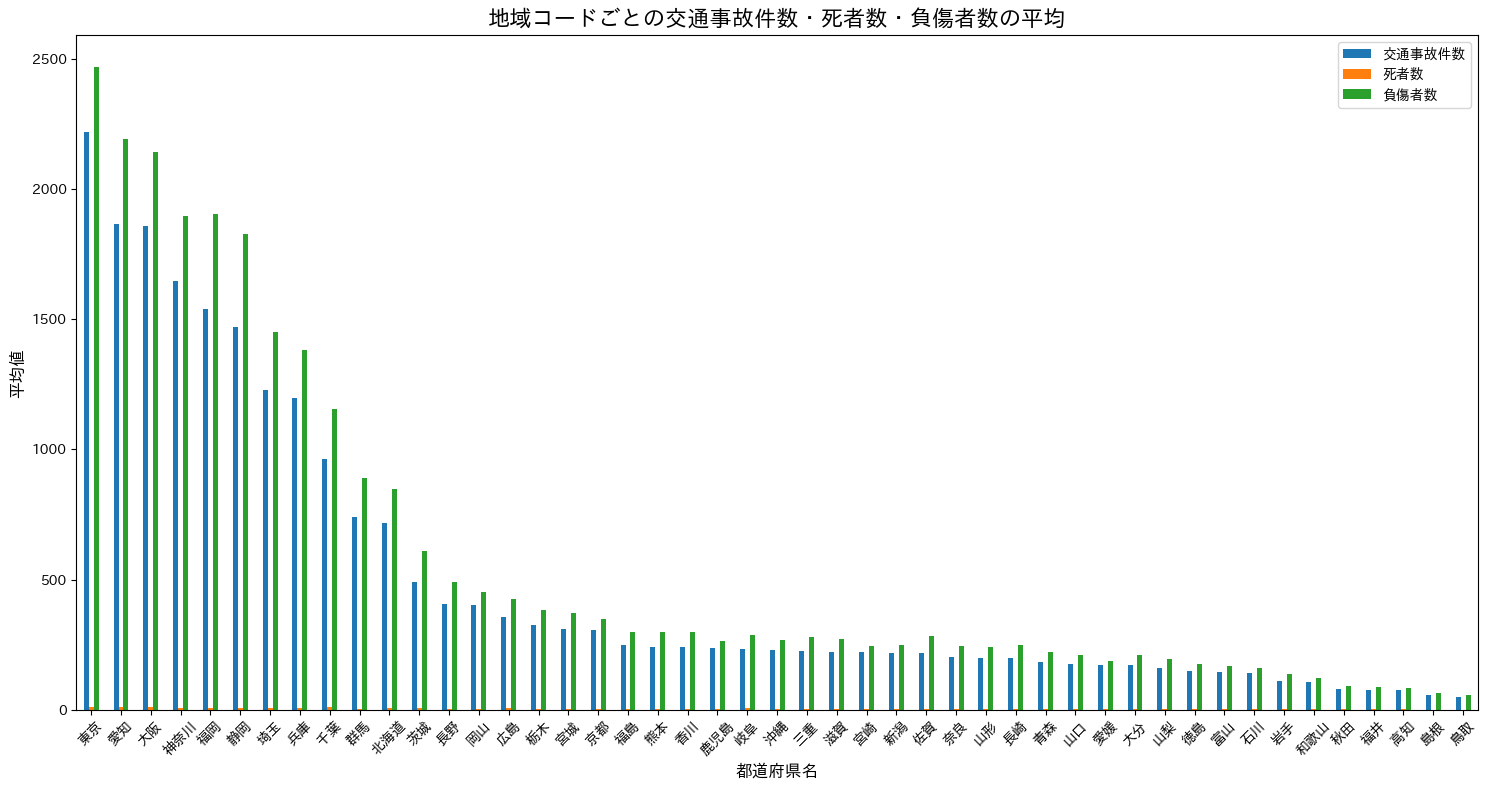

In [11]:
import matplotlib.pyplot as plt
import japanize_matplotlib
# 地域コードごとに平均を計算し、グラフを作成する関数
def plot_average_by_region(db_path, table_name):
    try:
        # データベースからデータを取得
        conn = sqlite3.connect(db_path)
        query = f"SELECT 都道府県名, 交通事故件数, 死者数, 負傷者数 FROM {table_name};"
        df = pd.read_sql_query(query, conn)
        conn.close()

        # 数値列を float に変換（必要に応じてエラーを無視）
        for col in ['交通事故件数', '死者数', '負傷者数']:
            df[col] = pd.to_numeric(df[col], errors='coerce')

        # 地域コードごとに平均を計算
        grouped = df.groupby('都道府県名').mean()

        # 交通事故件数、死者数、負傷者数を多い順に並べる
        grouped = grouped.sort_values(by=['交通事故件数', '死者数', '負傷者数'], ascending=False)

        # グラフを作成
        grouped.plot(kind='bar', figsize=(15, 8))
        plt.title('地域コードごとの交通事故件数・死者数・負傷者数の平均', fontsize=16)
        plt.xlabel('都道府県名', fontsize=12)
        plt.ylabel('平均値', fontsize=12)
        plt.xticks(rotation=45)
        plt.legend(loc='upper right')
        plt.tight_layout()

        # グラフを表示
        plt.show()
    except Exception as e:
        print(f"エラーが発生しました: {e}")

# 使用例
plot_average_by_region(
    db_path='traffic_data.db',    # SQLite データベースのパス
    table_name='traffic_accidents'  # テーブル名
)


In [13]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import sqlite3
import pandas as pd
from scipy.stats import ttest_1samp, mannwhitneyu

def plot_and_find_outliers_with_pvalue(db_path, table_name):
    try:
        # データベースからデータを取得
        conn = sqlite3.connect(db_path)
        query = f"SELECT 都道府県名, 交通事故件数, 死者数, 負傷者数 FROM {table_name};"
        df = pd.read_sql_query(query, conn)
        conn.close()

        # 数値列を float に変換（必要に応じてエラーを無視）
        for col in ['交通事故件数', '死者数', '負傷者数']:
            df[col] = pd.to_numeric(df[col], errors='coerce')

        # 欠損値を削除
        df = df.dropna(subset=['交通事故件数', '死者数', '負傷者数'])

        # 死者数の割合と負傷者数の割合を計算
        df['死者数割合'] = df['死者数'] / df['交通事故件数']
        df['負傷者数割合'] = df['負傷者数'] / df['交通事故件数']

        # 分散を確認
        if df['死者数割合'].var() == 0 or df['負傷者数割合'].var() == 0:
            print("分散がゼロのため、統計検定を実行できません。")
            return

        # 平均値を計算
        avg_death_ratio = df['死者数割合'].mean()
        avg_injury_ratio = df['負傷者数割合'].mean()

        # 死者数割合の差と負傷者数割合の差を計算
        df['死者数割合差'] = abs(df['死者数割合'] - avg_death_ratio)
        df['負傷者数割合差'] = abs(df['負傷者数割合'] - avg_injury_ratio)

        # 死者数割合と負傷者数割合で外れ値を抽出
        death_outliers = df.nlargest(3, '死者数割合差')[['都道府県名', '死者数割合', '死者数割合差']]
        injury_outliers = df.nlargest(3, '負傷者数割合差')[['都道府県名', '負傷者数割合', '負傷者数割合差']]

        print("死者数割合の外れ値（最も平均から外れた都道府県3つ）:")
        print(death_outliers)
        print("\n負傷者数割合の外れ値（最も平均から外れた都道府県3つ）:")
        print(injury_outliers)

        # 統計検定（p値の算出）
        print("\n統計検定の結果（p値）:")
        for _, row in death_outliers.iterrows():
            _, p_value = mannwhitneyu(df['死者数割合'], [row['死者数割合']])
            print(f"{row['都道府県名']} - 死者数割合: {row['死者数割合']:.4f}, p値: {p_value:.4e}")

    except Exception as e:
        print(f"エラーが発生しました: {e}")

# 使用例
plot_and_find_outliers_with_pvalue(
    db_path='traffic_data.db',    # SQLite データベースのパス
    table_name='traffic_accidents'  # テーブル名
)


死者数割合の外れ値（最も平均から外れた都道府県3つ）:
    都道府県名     死者数割合    死者数割合差
123   和歌山  0.077670  0.061625
333    秋田  0.076923  0.060878
77     鳥取  0.073171  0.057125

負傷者数割合の外れ値（最も平均から外れた都道府県3つ）:
    都道府県名    負傷者数割合   負傷者数割合差
134    佐賀  1.363229  0.180174
510    佐賀  1.360976  0.177921
182    長崎  1.351485  0.168430

統計検定の結果（p値）:
和歌山 - 死者数割合: 0.0777, p値: 8.5354e-02
秋田 - 死者数割合: 0.0769, p値: 8.6811e-02
鳥取 - 死者数割合: 0.0732, p値: 8.8288e-02
